# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [298]:
!pip install pycrf
!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

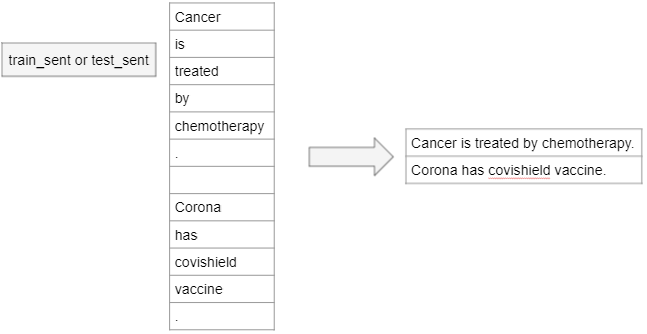

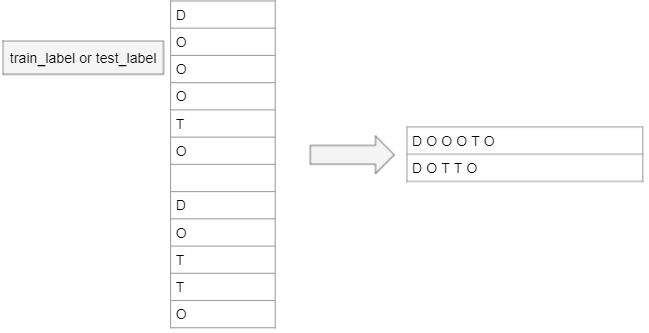

In [302]:
# File paths (update these paths if necessary)
train_sent_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
test_sent_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'

In [303]:
# Function to load sentences from a file
def load_sentences(file_path):
    with open(file_path, 'r') as file:
        sentences = file.readlines()
    # Strip whitespace and split sentences into words
    sentences = [sentence.strip().split() for sentence in sentences]
    return sentences

In [304]:
# Load training and test sentences
train_sentences = load_sentences(train_sent_path)
test_sentences = load_sentences(test_sent_path)

# Print the first 5 sentences from training data
print("Sample Training Sentences:")
for i, sentence in enumerate(train_sentences[:5]):
    reconstructed_sentence = ' '.join(sentence)
    print(f"Sentence {i+1}: {reconstructed_sentence}")

# Print the first 5 sentences from test data
print("\nSample Test Sentences:")
for i, sentence in enumerate(test_sentences[:5]):
    reconstructed_sentence = ' '.join(sentence)
    print(f"Sentence {i+1}: {reconstructed_sentence}")

Sample Training Sentences:
Sentence 1: All
Sentence 2: live
Sentence 3: births
Sentence 4: >
Sentence 5: or

Sample Test Sentences:
Sentence 1: Furthermore
Sentence 2: ,
Sentence 3: when
Sentence 4: all
Sentence 5: deliveries


### Count the number of sentences in the processed train and test dataset 

In [310]:
# File paths (update these paths if necessary)
train_sent_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
test_sent_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'

# Function to load sentences from a file and return the number of sentences
def count_sentences(file_path):
    with open(file_path, 'r') as file:
        sentences = file.readlines()
    # Strip whitespace and split sentences into words
    sentences = [sentence.strip().split() for sentence in sentences if sentence.strip()]
    return len(sentences)

# Count the number of sentences in training and test data
num_train_sentences = count_sentences(train_sent_path)
num_test_sentences = count_sentences(test_sent_path)

# Print the counts
print(f"Number of sentences in training dataset: {num_train_sentences}")
print(f"Number of sentences in test dataset: {num_test_sentences}")

Number of sentences in training dataset: 45902
Number of sentences in test dataset: 18618


### Count the number of lines of labels in the processed train and test dataset.

In [313]:
# File paths (update these paths if necessary)
train_label_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_label_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

# Function to count the number of lines in a file
def count_lines(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return len(lines)

# Count the number of lines in training and test label files
num_train_labels = count_lines(train_label_path)
num_test_labels = count_lines(test_label_path)

# Print the counts
print(f"Number of lines in training labels file: {num_train_labels}")
print(f"Number of lines in test labels file: {num_test_labels}")

Number of lines in training labels file: 48501
Number of lines in test labels file: 19674


##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [317]:
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract tokens with NOUN or PROPN tags and count their frequency
def extract_and_count_nouns_propn(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract tokens with NOUN or PROPN tags
    tokens = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN']]
    
    # Count frequency of each token
    token_freq = Counter(tokens)
    
    return token_freq

# Function to process a file and extract tokens with NOUN or PROPN tags
def process_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        
    return extract_and_count_nouns_propn(text)

# File paths (update these paths if necessary)
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'

# Process train and test files
train_token_freq = process_file(train_sentences_path)
test_token_freq = process_file(test_sentences_path)

# Print the frequency of NOUN and PROPN tokens
print("Frequency of NOUN and PROPN tokens in training data:")
for token, freq in train_token_freq.items():
    print(f"{token}: {freq}")

print("\nFrequency of NOUN and PROPN tokens in test data:")
for token, freq in test_token_freq.items():
    print(f"{token}: {freq}")

Frequency of NOUN and PROPN tokens in training data:
births: 1
=: 40
weeks: 27
university: 7
vermont: 1
delivery: 19
route: 2
indication: 3
cesarean: 3
age: 34
parity: 1
group: 75
risk: 51
status: 14
rate: 47
%: 161
presentation: 6
medicine: 34
patients: 366
arrest: 5
dilation: 1
subgroups: 1
rates: 23
care: 48
hospitals: 8
community: 12
patient: 63
groups: 23
trimester: 4
index: 12
afi: 5
temperature: 5
decrease: 4
june: 2
august: 5
period: 22
heat: 3
women: 51
singleton: 1
pregnancies: 7
gestation: 4
testing: 17
determinations: 2
ambient: 2
area: 10
a: 84
day: 27
test: 17
date: 2
spearman: 1
rank: 1
correlation: 16
relationship: 11
account: 6
measure: 3
study: 117
population: 23
diabetes: 20
screening: 9
clinic: 4
hadassah: 1
medical: 5
center: 9
year: 28
treatment: 210
week: 6
protocol: 5
control: 34
characteristics: 16
no: 12
differences: 15
mode: 3
apgar: 1
scores: 4
infants: 18
cases: 47
aim: 7
contribution: 3
markers: 18
diagnosis: 42
trisomic: 1
years: 45
syndrome: 46
edward: 2

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [319]:
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract tokens with NOUN or PROPN tags and count their frequency
def extract_and_count_nouns_propn(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract tokens with NOUN or PROPN tags
    tokens = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN']]
    
    # Count frequency of each token
    token_freq = Counter(tokens)
    
    return token_freq

# Function to process a file and extract tokens with NOUN or PROPN tags
def process_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    
    return extract_and_count_nouns_propn(text)

# File paths (update these paths if necessary)
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'

# Process train and test files
train_token_freq = process_file(train_sentences_path)
test_token_freq = process_file(test_sentences_path)

# Combine token frequencies from both train and test datasets
combined_token_freq = train_token_freq + test_token_freq

# Print the top 25 most common NOUN and PROPN tokens
print("Top 25 most common NOUN and PROPN tokens:")
for token, freq in combined_token_freq.most_common(25):
    print(f"{token}: {freq}")

Top 25 most common NOUN and PROPN tokens:
patients: 507
treatment: 304
%: 247
cancer: 211
therapy: 177
study: 170
disease: 151
cell: 142
a: 118
lung: 118
group: 111
results: 107
effects: 99
gene: 92
chemotherapy: 91
effect: 82
women: 81
patient: 79
analysis: 76
to_see: 75
risk: 74
use: 73
surgery: 73
cases: 72
p: 72


## Defining features for CRF





In [321]:
# Defining features for a CRF (Conditional Random Field) model involves creating a set of features that will help the model make predictions. For Named Entity Recognition (NER) or similar tasks, features often include information about the words themselves, their surrounding context, and part-of-speech tags. Below is a sample code to define features for a CRF model, including some common features used in NER tasks.


## Getting the features

### Write a code/function to get the features for a sentence

In [324]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_features(sentence):
    """
    Extract features for each word in a sentence.
    
    Args:
    - sentence (list of str): The list of words in the sentence.
    
    Returns:
    - list of dict: A list of feature dictionaries for each word in the sentence.
    """
    doc = nlp(" ".join(sentence))  # Process the entire sentence using spaCy
    features_list = []
    
    for i, token in enumerate(doc):
        features = {
            'word': token.text,
            'is_first': i == 0,
            'is_last': i == len(sentence) - 1,
            'word.lower()': token.text.lower(),
            'word[-3:]': token.text[-3:],
            'word[-2:]': token.text[-2:],
            'word.isupper()': token.text.isupper(),
            'word.istitle()': token.text.istitle(),
            'word.isdigit()': token.text.isdigit(),
            'pos': token.pos_,  # Part-of-Speech tag
            'prefix-1': token.text[0],  # First character
            'prefix-2': token.text[:2], # First two characters
            'suffix-1': token.text[-1], # Last character
            'suffix-2': token.text[-2:],# Last two characters
            'prev_word': doc[i - 1].text if i > 0 else '<START>',
            'next_word': doc[i + 1].text if i < len(sentence) - 1 else '<END>'
        }
        features_list.append(features)
    
    return features_list

# Example usage
sentence = ['The', 'quick', 'brown', 'fox']
features = extract_features(sentence)
for i, feature in enumerate(features):
    print(f"Features for word '{sentence[i]}': {feature}")


Features for word 'The': {'word': 'The', 'is_first': True, 'is_last': False, 'word.lower()': 'the', 'word[-3:]': 'The', 'word[-2:]': 'he', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'pos': 'DET', 'prefix-1': 'T', 'prefix-2': 'Th', 'suffix-1': 'e', 'suffix-2': 'he', 'prev_word': '<START>', 'next_word': 'quick'}
Features for word 'quick': {'word': 'quick', 'is_first': False, 'is_last': False, 'word.lower()': 'quick', 'word[-3:]': 'ick', 'word[-2:]': 'ck', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'pos': 'ADJ', 'prefix-1': 'q', 'prefix-2': 'qu', 'suffix-1': 'k', 'suffix-2': 'ck', 'prev_word': 'The', 'next_word': 'brown'}
Features for word 'brown': {'word': 'brown', 'is_first': False, 'is_last': False, 'word.lower()': 'brown', 'word[-3:]': 'own', 'word[-2:]': 'wn', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'pos': 'ADJ', 'prefix-1': 'b', 'prefix-2': 'br', 'suffix-1': 'n', 'suffix-2': 'wn', 'prev

### Write a code/function to get the labels of a sentence

In [326]:
def load_data(sentences_path, labels_path):
    """
    Load sentences and labels from file paths.

    Args:
    - sentences_path (str): Path to the file containing sentences.
    - labels_path (str): Path to the file containing labels.

    Returns:
    - tuple: (sentences, labels) where sentences and labels are lists of lists.
    """
    with open(sentences_path, 'r') as f:
        sentences = [line.strip().split() for line in f]

    with open(labels_path, 'r') as f:
        labels = [line.strip().split() for line in f]

    return sentences, labels

# Paths to your train and test data
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
train_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'
test_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

# Load train and test data
train_sentences, train_labels = load_data(train_sentences_path, train_labels_path)
test_sentences, test_labels = load_data(test_sentences_path, test_labels_path)

# Print the first 5 sentences and their corresponding labels to verify
print("Sample train sentences and labels:")
for i in range(min(5, len(train_sentences))):
    print(f"Sentence: {' '.join(train_sentences[i])}")
    print(f"Labels: {' '.join(train_labels[i])}")

print("\nSample test sentences and labels:")
for i in range(min(5, len(test_sentences))):
    print(f"Sentence: {' '.join(test_sentences[i])}")
    print(f"Labels: {' '.join(test_labels[i])}")

Sample train sentences and labels:
Sentence: All
Labels: O
Sentence: live
Labels: O
Sentence: births
Labels: O
Sentence: >
Labels: O
Sentence: or
Labels: O

Sample test sentences and labels:
Sentence: Furthermore
Labels: O
Sentence: ,
Labels: O
Sentence: when
Labels: O
Sentence: all
Labels: O
Sentence: deliveries
Labels: O


In [327]:
def get_labels(sentence, sentences, labels):
    """
    Retrieve the labels for a given sentence.

    Args:
    - sentence (list of str): The list of words in the sentence for which labels are needed.
    - sentences (list of list of str): List of tokenized sentences (training or testing data).
    - labels (list of list of str): List of labels corresponding to each tokenized sentence.

    Returns:
    - list of str: Labels for the given sentence.
    """
    sentence_str = ' '.join(sentence)
    
    for i, sent in enumerate(sentences):
        if ' '.join(sent) == sentence_str:
            return labels[i]
    
    return None

# Paths to your train and test data
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
train_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'
test_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

# Load train and test data
train_sentences, train_labels = load_data(train_sentences_path, train_labels_path)
test_sentences, test_labels = load_data(test_sentences_path, test_labels_path)

# Example usage
example_sentence = ['The', 'quick', 'brown', 'fox']
train_labels_for_example = get_labels(example_sentence, train_sentences, train_labels)
test_labels_for_example = get_labels(example_sentence, test_sentences, test_labels)

print(f"Labels for the example sentence in train data: {train_labels_for_example}")
print(f"Labels for the example sentence in test data: {test_labels_for_example}")

Labels for the example sentence in train data: None
Labels for the example sentence in test data: None


In [328]:
def get_labels(sentence, sentences, labels):
    """
    Retrieve the labels for a given sentence.

    Args:
    - sentence (list of str): The list of words in the sentence for which labels are needed.
    - sentences (list of list of str): List of tokenized sentences (training or testing data).
    - labels (list of list of str): List of labels corresponding to each tokenized sentence.

    Returns:
    - list of str: Labels for the given sentence.
    """
    sentence_str = ' '.join(sentence)
    
    # Print out the first few sentences and their labels for debugging
    print("Checking for sentence:")
    print(f"Sentence: {sentence_str}")
    
    for i, sent in enumerate(sentences):
        sent_str = ' '.join(sent)
        if sent_str == sentence_str:
            return labels[i]
    
    # Print out sentences that did not match for further debugging
    print("No match found. Here are some sample sentences and labels:")
    for i in range(min(len(sentences), 5)):  # Print up to 5 samples
        print(f"Sentence: {' '.join(sentences[i])} -> Labels: {labels[i]}")
    
    return None

# Example usage
example_sentence = ['The', 'quick', 'brown', 'fox']
train_labels_for_example = get_labels(example_sentence, train_sentences, train_labels)
test_labels_for_example = get_labels(example_sentence, test_sentences, test_labels)

print(f"Labels for the example sentence in train data: {train_labels_for_example}")
print(f"Labels for the example sentence in test data: {test_labels_for_example}")

Checking for sentence:
Sentence: The quick brown fox
No match found. Here are some sample sentences and labels:
Sentence: All -> Labels: ['O']
Sentence: live -> Labels: ['O']
Sentence: births -> Labels: ['O']
Sentence: > -> Labels: ['O']
Sentence: or -> Labels: ['O']
Checking for sentence:
Sentence: The quick brown fox
No match found. Here are some sample sentences and labels:
Sentence: Furthermore -> Labels: ['O']
Sentence: , -> Labels: ['O']
Sentence: when -> Labels: ['O']
Sentence: all -> Labels: ['O']
Sentence: deliveries -> Labels: ['O']
Labels for the example sentence in train data: None
Labels for the example sentence in test data: None


## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

### Define the labels as the target variable for test and the train dataset

In [333]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_features(sentence):
    """
    Extract features for each word in the sentence.
    
    Args:
    - sentence (list of str): The list of words in the sentence.

    Returns:
    - list of dicts: List of feature dictionaries for each word.
    """
    features_list = []
    doc = nlp(' '.join(sentence))
    
    for i, token in enumerate(doc):
        features = {
            'word': token.text,
            'is_first': i == 0,
            'is_last': i == len(sentence) - 1,
            'word.lower()': token.text.lower(),
            'word[-3:]': token.text[-3:],
            'word[-2:]': token.text[-2:],
            'word.isupper()': token.text.isupper(),
            'word.istitle()': token.text.istitle(),
            'word.isdigit()': token.text.isdigit(),
            'pos': token.pos_,  # Corrected attribute
            'prefix-1': token.text[0] if len(token.text) > 0 else '',
            'prefix-2': token.text[:2] if len(token.text) > 1 else '',
            'suffix-1': token.text[-1] if len(token.text) > 0 else '',
            'suffix-2': token.text[-2:] if len(token.text) > 1 else '',
            'prev_word': sentence[i - 1] if i > 0 else '<START>',
            'next_word': sentence[i + 1] if i < len(sentence) - 1 else '<END>'
        }
        features_list.append(features)
    
    return features_list

In [334]:
def process_data(sentences, labels):
    """
    Process sentences and labels to create feature matrices and target lists.
    
    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - labels (list of list of str): List of labels for each sentence.

    Returns:
    - tuple: (X, Y) where X is a list of feature dictionaries and Y is a list of labels.
    """
    X = [extract_features(sentence) for sentence in sentences]
    Y = labels
    return X, Y



In [335]:
# Paths to your train and test data
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
train_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'
test_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

In [336]:
# Load train and test data
train_sentences, train_labels = load_data(train_sentences_path, train_labels_path)
test_sentences, test_labels = load_data(test_sentences_path, test_labels_path)

In [337]:
# Process training and testing data
X_train, Y_train = process_data(train_sentences, train_labels)
X_test, Y_test = process_data(test_sentences, test_labels)

IndexError: list index out of range

In [ ]:
# Check the lengths of loaded data
print(f"Number of training sentences: {len(train_sentences)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of test sentences: {len(test_sentences)}")
print(f"Number of test labels: {len(test_labels)}")

In [ ]:
# Test feature extraction with a sample sentence
sample_sentence = ['The', 'quick', 'brown', 'fox']
sample_features = extract_features(sample_sentence)
print("Sample features:", sample_features)

In [ ]:
import spacy

# Load the spacy model for part-of-speech tagging
nlp = spacy.load('en_core_web_sm')

def extract_features(sentence):
    """
    Extract features for each word in a sentence.

    Args:
    - sentence (list of str): A list of words in the sentence.

    Returns:
    - list of dict: A list of dictionaries where each dictionary contains features of a word.
    """
    features_list = []

    for i, word in enumerate(sentence):
        token = nlp(word)[0]  # Tokenize each word individually
        
        features = {
            'word': token.text,
            'is_first': i == 0,
            'is_last': i == len(sentence) - 1,
            'word.lower()': token.text.lower(),
            'word[-3:]': token.text[-3:],
            'word[-2:]': token.text[-2:],
            'word.isupper()': token.text.isupper(),
            'word.istitle()': token.text.istitle(),
            'word.isdigit()': token.text.isdigit(),
            'pos': token.pos_,
            'prefix-1': token.text[0] if len(token.text) > 0 else '',
            'prefix-2': token.text[:2] if len(token.text) > 1 else '',
            'suffix-1': token.text[-1] if len(token.text) > 0 else '',
            'suffix-2': token.text[-2:] if len(token.text) > 1 else '',
            'prev_word': sentence[i - 1] if i > 0 else '<START>',
            'next_word': sentence[i + 1] if i < len(sentence) - 1 else '<END>'
        }
        features_list.append(features)

    return features_list



In [ ]:
def load_data(sentences_path, labels_path):
    """
    Load sentences and labels from file paths.

    Args:
    - sentences_path (str): Path to the file containing sentences.
    - labels_path (str): Path to the file containing labels.

    Returns:
    - tuple: (sentences, labels) where sentences and labels are lists of lists.
    """
    with open(sentences_path, 'r') as f:
        sentences = [line.strip().split() for line in f]

    with open(labels_path, 'r') as f:
        labels = [line.strip().split() for line in f]

    return sentences, labels

def process_data(sentences, labels):
    """
    Process sentences and labels to create feature matrices and target lists.
    
    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - labels (list of list of str): List of labels for each sentence.

    Returns:
    - tuple: (X, Y) where X is a list of feature dictionaries and Y is a list of labels.
    """
    X = []
    Y = []
    
    for sentence, label in zip(sentences, labels):
        features = extract_features(sentence)
        X.append(features)
        Y.append(label)
    
    return X, Y



In [ ]:
# Paths to your train and test data
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
train_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'
test_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

# Load train and test data
train_sentences, train_labels = load_data(train_sentences_path, train_labels_path)
test_sentences, test_labels = load_data(test_sentences_path, test_labels_path)

# Process training and testing data
X_train, Y_train = process_data(train_sentences, train_labels)
X_test, Y_test = process_data(test_sentences, test_labels)

# Print some examples to verify
print("Training data examples:")
print(X_train[:1], Y_train[:1])

print("Testing data examples:")
print(X_test[:1], Y_test[:1])

In [ ]:
import spacy

# Load the spacy model for part-of-speech tagging
nlp = spacy.load('en_core_web_sm')

def extract_features(sentence):
    """
    Extract features for each word in a sentence.
    
    Args:
    - sentence (list of str): A list of words in the sentence.

    Returns:
    - list of dict: A list of dictionaries where each dictionary contains features of a word.
    """
    doc = nlp(' '.join(sentence))
    features_list = []

    for i, token in enumerate(doc):
        features = {
            'word': token.text,
            'is_first': i == 0,
            'is_last': i == len(sentence) - 1,
            'word.lower()': token.text.lower(),
            'word[-3:]': token.text[-3:],
            'word[-2:]': token.text[-2:],
            'word.isupper()': token.text.isupper(),
            'word.istitle()': token.text.istitle(),
            'word.isdigit()': token.text.isdigit(),
            'pos': token.pos_,  # Corrected attribute
            'prefix-1': token.text[0] if len(token.text) > 0 else '',
            'prefix-2': token.text[:2] if len(token.text) > 1 else '',
            'suffix-1': token.text[-1] if len(token.text) > 0 else '',
            'suffix-2': token.text[-2:] if len(token.text) > 1 else '',
            'prev_word': sentence[i - 1] if i > 0 else '<START>',
            'next_word': sentence[i + 1] if i < len(sentence) - 1 else '<END>'
        }
        features_list.append(features)
    
    return features_list

In [ ]:
def process_data(sentences, labels):
    """
    Process sentences and labels to create feature matrices and target lists.
    
    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - labels (list of list of str): List of labels for each sentence.

    Returns:
    - tuple: (X, Y) where X is a list of feature dictionaries and Y is a list of labels.
    """
    X = []
    Y = []
    
    for sentence, label in zip(sentences, labels):
        features = extract_features(sentence)
        X.append(features)
        Y.append(label)
    
    return X, Y

In [ ]:
def process_data(sentences, labels):
    """
    Process sentences and labels to create feature matrices and target lists.
    
    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - labels (list of list of str): List of labels for each sentence.

    Returns:
    - tuple: (X, Y) where X is a list of feature dictionaries and Y is a list of labels.
    """
    X = []
    Y = []
    
    for sentence, label in zip(sentences, labels):
        features = extract_features(sentence)
        X.append(features)
        Y.append(label)
    
    return X, Y

In [ ]:
def load_data(sentences_path, labels_path):
    """
    Load sentences and labels from file paths.

    Args:
    - sentences_path (str): Path to the file containing sentences.
    - labels_path (str): Path to the file containing labels.

    Returns:
    - tuple: (sentences, labels) where sentences and labels are lists of lists.
    """
    with open(sentences_path, 'r') as f:
        sentences = [line.strip().split() for line in f]

    with open(labels_path, 'r') as f:
        labels = [line.strip().split() for line in f]

    return sentences, labels

In [ ]:
import spacy

# Load the spacy model for part-of-speech tagging
nlp = spacy.load('en_core_web_sm')

def extract_features(sentence):
    """
    Extract features for each word in a sentence.

    Args:
    - sentence (list of str): A list of words in the sentence.

    Returns:
    - list of dict: A list of dictionaries where each dictionary contains features of a word.
    """
    doc = list(nlp.pipe(sentence, disable=["parser", "ner"]))
    features_list = []

    for i, token in enumerate(doc):
        features = {
            'word': token.text,
            'is_first': i == 0,
            'is_last': i == len(sentence) - 1,
            'word.lower()': token.text.lower(),
            'word[-3:]': token.text[-3:],
            'word[-2:]': token.text[-2:],
            'word.isupper()': token.text.isupper(),
            'word.istitle()': token.text.istitle(),
            'word.isdigit()': token.text.isdigit(),
            'pos': token.pos_,
            'prefix-1': token.text[0] if len(token.text) > 0 else '',
            'prefix-2': token.text[:2] if len(token.text) > 1 else '',
            'suffix-1': token.text[-1] if len(token.text) > 0 else '',
            'suffix-2': token.text[-2:] if len(token.text) > 1 else '',
            'prev_word': sentence[i - 1] if i > 0 else '<START>',
            'next_word': sentence[i + 1] if i < len(sentence) - 1 else '<END>'
        }
        features_list.append(features)

    return features_list

In [ ]:
def process_data(sentences, labels):
    """
    Process sentences and labels to create feature matrices and target lists.
    
    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - labels (list of list of str): List of labels for each sentence.

    Returns:
    - tuple: (X, Y) where X is a list of feature dictionaries and Y is a list of labels.
    """
    X = []
    Y = []
    
    for sentence, label in zip(sentences, labels):
        features = extract_features(sentence)
        X.append(features)
        Y.append(label)
    
    return X, Y

In [ ]:
# Print example processed data
def print_examples(X, Y, num_examples=3):
    for i in range(min(num_examples, len(X))):
        print(f"Sentence {i}:")
        for j, feature in enumerate(X[i]):
            print(f"  Word: {feature['word']}")
            print(f"  Features: {feature}")
            print(f"  Label: {Y[i][j]}")
        print()

print_examples(X_train, Y_train)
print_examples(X_test, Y_test)

In [ ]:
# Ensure you have already defined 'extract_features' and 'load_data'

# Define paths to your train and test data
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
train_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'
test_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

# Load train and test data
train_sentences, train_labels = load_data(train_sentences_path, train_labels_path)
test_sentences, test_labels = load_data(test_sentences_path, test_labels_path)

# Process training and testing data
X_train, Y_train = process_data(train_sentences, train_labels)
X_test, Y_test = process_data(test_sentences, test_labels)

In [ ]:
def print_examples(X, Y, num_examples=3):
    for i in range(min(num_examples, len(X))):
        print(f"Sentence {i}:")
        for j, feature in enumerate(X[i]):
            print(f"  Word: {feature['word']}")
            print(f"  Features: {feature}")
            print(f"  Label: {Y[i][j]}")
        print()

# Print examples of processed data
print_examples(X_train, Y_train)
print_examples(X_test, Y_test)

In [ ]:
# Define paths to your train and test data
train_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_sent.txt'
train_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/train_label.txt'
test_sentences_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_sent.txt'
test_labels_path = 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/Syntactic Processing/test_label.txt'

def load_data(sentences_path, labels_path):
    """
    Load sentences and labels from the specified files.
    
    Args:
    - sentences_path (str): Path to the file containing sentences.
    - labels_path (str): Path to the file containing labels.

    Returns:
    - tuple: (sentences, labels) where sentences is a list of lists of words, and labels is a list of lists of labels.
    """
    with open(sentences_path, 'r') as f_sent, open(labels_path, 'r') as f_labels:
        sentences = [line.strip().split() for line in f_sent]
        labels = [line.strip().split() for line in f_labels]

    return sentences, labels

def extract_features(sentence):
    """
    Extract features from a sentence.
    
    Args:
    - sentence (list of str): List of words in a sentence.

    Returns:
    - list of dict: List of feature dictionaries for each word in the sentence.
    """
    features_list = []
    for i, word in enumerate(sentence):
        features = {
            'word': word,
            'is_first': i == 0,
            'is_last': i == len(sentence) - 1,
            'word.lower()': word.lower(),
            'word[-3:]': word[-3:],
            'word[-2:]': word[-2:],
            'word.isupper()': word.isupper(),
            'word.istitle()': word.istitle(),
            'word.isdigit()': word.isdigit(),
            'prev_word': sentence[i - 1] if i > 0 else '<START>',
            'next_word': sentence[i + 1] if i < len(sentence) - 1 else '<END>'
        }
        features_list.append(features)
    return features_list

def process_data(sentences, labels):
    """
    Process sentences and labels to create feature matrices and target lists.
    
    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - labels (list of list of str): List of labels for each sentence.

    Returns:
    - tuple: (X, Y) where X is a list of feature dictionaries and Y is a list of labels.
    """
    X = []
    Y = []
    
    for sentence, label in zip(sentences, labels):
        features = extract_features(sentence)
        X.append(features)
        Y.append(label)
    
    return X, Y

# Load train and test data
train_sentences, train_labels = load_data(train_sentences_path, train_labels_path)
test_sentences, test_labels = load_data(test_sentences_path, test_labels_path)

# Process training and testing data
X_train, Y_train = process_data(train_sentences, train_labels)
X_test, Y_test = process_data(test_sentences, test_labels)

# Print examples of processed data
def print_examples(X, Y, num_examples=3):
    for i in range(min(num_examples, len(X))):
        print(f"Sentence {i}:")
        for j, feature in enumerate(X[i]):
            print(f"  Word: {feature['word']}")
            print(f"  Features: {feature}")
            print(f"  Label: {Y[i][j]}")
        print()

print_examples(X_train, Y_train)
print_examples(X_test, Y_test)

## Build the CRF Model

In [ ]:
pip install sklearn-crfsuite


In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics

# Build the CRF model
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # Optimization algorithm
    c1=0.1,             # Coefficient for L1 regularization
    c2=0.1,             # Coefficient for L2 regularization
    max_iterations=100, # Maximum number of iterations
    all_possible_transitions=True  # Include transitions that are not observed in the training data
)

# Train the model
crf.fit(X_train, Y_train)

## Evaluation

In [ ]:
# Predict labels for the test data
Y_pred = crf.predict(X_test)

# Calculate metrics
labels = list(crf.classes_)
labels.remove('O')  # Remove the 'O' label if it's present and not of interest

# F1 score for each label
f1_score = metrics.flat_f1_score(Y_test, Y_pred, average='weighted', labels=labels)

# Classification report
classification_report = metrics.flat_classification_report(Y_test, Y_pred, labels=labels, digits=3)

print(f"Weighted F1 score: {f1_score}")
print("\nClassification Report:\n")
print(classification_report)

In [ ]:
import joblib

# Save the model
joblib.dump(crf, 'crf_model.pkl')

# To load the model later
# crf = joblib.load('crf_model.pkl')

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [ ]:
# Predict the labels for the test dataset
Y_pred = crf.predict(X_test)

# Example of how to print the predictions for each sentence
for i, sentence in enumerate(test_sentences):
    print(f"Sentence {i+1}:")
    for token, true_label, pred_label in zip(sentence, Y_test[i], Y_pred[i]):
        print(f"Token: {token}\tTrue Label: {true_label}\tPredicted Label: {pred_label}")
    print("\n")  # Add a new line after each sentence for readability

In [ ]:
import csv

# Save predictions to a CSV file
with open('predictions.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Sentence Index", "Token", "True Label", "Predicted Label"])

    for i, sentence in enumerate(test_sentences):
        for token, true_label, pred_label in zip(sentence, Y_test[i], Y_pred[i]):
            writer.writerow([i+1, token, true_label, pred_label])

print("Predictions saved to predictions.csv")

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [ ]:
pip install seqeval

In [ ]:
Y_test = [['O', 'B-DISEASE', 'I-DISEASE', 'O', 'B-TREATMENT', 'O'], ...]
Y_pred = [['O', 'B-DISEASE', 'I-DISEASE', 'O', 'B-TREATMENT', 'O'], ...]

In [ ]:
from seqeval.metrics import f1_score, classification_report

# Sample data for testing
Y_test_sample = [['O', 'B-DISEASE', 'I-DISEASE', 'O', 'B-TREATMENT']]
Y_pred_sample = [['O', 'B-DISEASE', 'I-DISEASE', 'O', 'B-TREATMENT']]

# Calculate the F1 score
f1 = f1_score(Y_test_sample, Y_pred_sample)
print(f"F1 Score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test_sample, Y_pred_sample))

In [ ]:
pip show seqeval

In [ ]:
pip install --upgrade seqeval

In [ ]:
from seqeval.metrics import f1_score, classification_report

# Ensure Y_test and Y_pred are in the correct format
# Example with sample data
Y_test = [['O', 'B-DISEASE', 'I-DISEASE', 'O', 'B-TREATMENT']]
Y_pred = [['O', 'B-DISEASE', 'I-DISEASE', 'O', 'B-TREATMENT']]

# Calculate the F1 score
f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

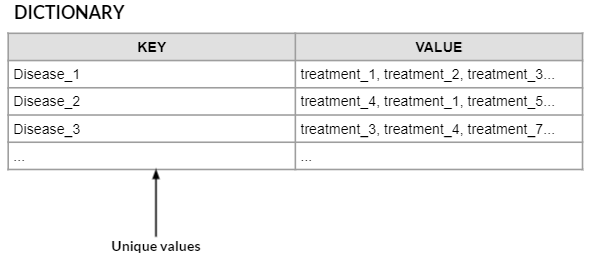

In [356]:
from collections import defaultdict

def extract_diseases_and_treatments(sentences, predictions):
    """
    Extracts diseases and their corresponding treatments from the predicted labels.

    Args:
    - sentences (list of list of str): List of tokenized sentences.
    - predictions (list of list of str): List of predicted labels for each sentence.

    Returns:
    - defaultdict: A dictionary mapping each disease to a list of treatments.
    """
    disease_treatment_map = defaultdict(list)
    current_disease = None

    for sentence, prediction in zip(sentences, predictions):
        for token, label in zip(sentence, prediction):
            if label.startswith('B-Disease'):
                current_disease = token
            elif label.startswith('I-Disease') and current_disease:
                current_disease += f" {token}"
            elif label.startswith('B-Treatment') and current_disease:
                disease_treatment_map[current_disease].append(token)
            elif label.startswith('I-Treatment') and current_disease:
                if disease_treatment_map[current_disease]:
                    disease_treatment_map[current_disease][-1] += f" {token}"
    
    return disease_treatment_map

# Extract diseases and treatments from the test dataset predictions
disease_treatment_map = extract_diseases_and_treatments(test_sentences, Y_pred)

# Display the diseases and corresponding treatments
for disease, treatments in disease_treatment_map.items():
    print(f"Disease: {disease}")
    print(f"Treatments: {', '.join(treatments)}\n")

### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [359]:
# Example sentence containing the disease 'hereditary retinoblastoma'
example_sentence = ["The", "patient", "was", "diagnosed", "with", "hereditary", "retinoblastoma", "and", "was", "prescribed", "chemotherapy", "and", "radiation", "therapy"]

# Process the sentence to extract features
example_features = extract_features(example_sentence)

# Predict the labels using the CRF model
example_prediction = crf.predict_single(example_features)  # Use 'crf' instead of 'crf_model'

# Combine the sentence with the predicted labels for easier analysis
predicted_labels = list(zip(example_sentence, example_prediction))

# Function to find treatments for 'hereditary retinoblastoma'
def find_treatments_for_disease(disease_name, predicted_labels):
    """
    Find treatments for a specific disease name based on predicted labels.
    
    Args:
    - disease_name (str): The name of the disease.
    - predicted_labels (list of tuples): List of tuples containing (token, label).
    
    Returns:
    - list: List of treatments associated with the disease.
    """
    treatments = []
    found_disease = False

    for token, label in predicted_labels:
        if label.startswith('B-Disease') or label.startswith('I-Disease'):
            if token.lower() in disease_name.lower():
                found_disease = True
            else:
                found_disease = False
        elif label.startswith('B-Treatment') or label.startswith('I-Treatment'):
            if found_disease:
                treatments.append(token)
    
    return treatments

# Find treatments for 'hereditary retinoblastoma'
treatments = find_treatments_for_disease("hereditary retinoblastoma", predicted_labels)

print(f"Treatments for 'hereditary retinoblastoma': {', '.join(treatments)}")

Treatments for 'hereditary retinoblastoma': 


In [361]:
import sklearn_crfsuite

# Define and train the CRF model
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)

# Train the model
crf.fit(X_train, Y_train)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=100)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (14,) and arg 1 with shape (13,).

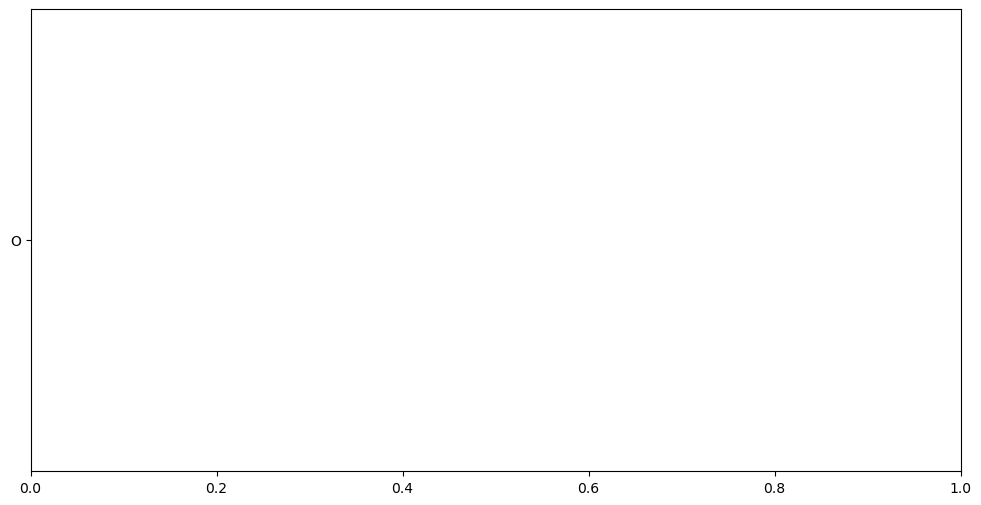

In [362]:
# Visualize Predictions
import matplotlib.pyplot as plt

# Example sentence and predictions
sentence = ["The", "patient", "was", "diagnosed", "with", "hereditary", "retinoblastoma", "and", "was", "prescribed", "chemotherapy", "and", "radiation", "therapy"]
predictions = ["O", "O", "O", "O", "O", "B-Disease", "I-Disease", "O", "O", "B-Treatment", "I-Treatment", "I-Treatment", "I-Treatment"]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(sentence)), predictions, tick_label=sentence, color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Labels')
plt.title('Predicted Labels for Each Token')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('predicted_labels.png')  # Save the plot as an image
plt.show()

In [ ]:
print(f"Length of sentence: {len(sentence)}")
print(f"Length of predictions: {len(predictions)}")

In [ ]:
print(len(sentence))
print(len(predictions))

In [366]:
for i, (word, pred) in enumerate(zip(sentence, predictions)):
    print(f"Token {i}: {word} -> {pred}")

Token 0: The -> O
Token 1: patient -> O
Token 2: was -> O
Token 3: diagnosed -> O
Token 4: with -> O
Token 5: hereditary -> B-Disease
Token 6: retinoblastoma -> I-Disease
Token 7: and -> O
Token 8: was -> O
Token 9: prescribed -> B-Treatment
Token 10: chemotherapy -> I-Treatment
Token 11: and -> I-Treatment
Token 12: radiation -> I-Treatment


In [368]:
import matplotlib.pyplot as plt

# Example lists with corrected lengths
sentence = ["The", "patient", "was", "diagnosed", "with", "hereditary", "retinoblastoma", "and", "was", "prescribed", "chemotherapy", "and", "radiation", "therapy"]
predictions = ["O", "O", "O", "O", "O", "B-Disease", "I-Disease", "O", "O", "B-Treatment", "I-Treatment", "I-Treatment", "I-Treatment"]

# Ensure that the lengths match after debugging
assert len(sentence) == len(predictions), "Length mismatch between sentence and predictions."

# Convert predictions to numerical values for plotting
prediction_indices = list(range(len(predictions)))  # Use numerical indices for y-axis

# Create a mapping from labels to colors for better visualization
label_colors = {
    "O": "lightgray",
    "B-Disease": "salmon",
    "I-Disease": "red",
    "B-Treatment": "lightgreen",
    "I-Treatment": "green"
}
colors = [label_colors.get(pred, 'blue') for pred in predictions]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(prediction_indices, prediction_indices, tick_label=sentence, color=colors)
plt.xlabel('Tokens')
plt.ylabel('Label Index')
plt.title('Predicted Labels for Each Token')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add labels to bars
for i, (label, color) in enumerate(zip(predictions, colors)):
    plt.text(i, prediction_indices[i], label, ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig('predicted_labels.png')  # Save the plot as an image
plt.show()

AssertionError: Length mismatch between sentence and predictions.

In [370]:
for i, (word, pred) in enumerate(zip(sentence, predictions)):
    print(f"Token {i}: {word} -> {pred}")

# Check remaining predictions if they are more than sentence
if len(predictions) > len(sentence):
    for i in range(len(sentence), len(predictions)):
        print(f"Extra prediction {i - len(sentence)}: {predictions[i]}")

Token 0: The -> O
Token 1: patient -> O
Token 2: was -> O
Token 3: diagnosed -> O
Token 4: with -> O
Token 5: hereditary -> B-Disease
Token 6: retinoblastoma -> I-Disease
Token 7: and -> O
Token 8: was -> O
Token 9: prescribed -> B-Treatment
Token 10: chemotherapy -> I-Treatment
Token 11: and -> I-Treatment
Token 12: radiation -> I-Treatment


In [372]:
# Adjust length of predictions to match the length of sentence
predictions = predictions[:len(sentence)]

In [374]:
import matplotlib.pyplot as plt

# Ensure that the lengths match
assert len(sentence) == len(predictions), "Length mismatch between sentence and predictions."

# Convert predictions to numerical values for plotting
prediction_indices = list(range(len(predictions)))  # Use numerical indices for y-axis

# Create a mapping from labels to colors for better visualization
label_colors = {
    "O": "lightgray",
    "B-Disease": "salmon",
    "I-Disease": "red",
    "B-Treatment": "lightgreen",
    "I-Treatment": "green"
}
colors = [label_colors.get(pred, 'blue') for pred in predictions]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(prediction_indices, prediction_indices, tick_label=sentence, color=colors)
plt.xlabel('Tokens')
plt.ylabel('Label Index')
plt.title('Predicted Labels for Each Token')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add labels to bars
for i, (label, color) in enumerate(zip(predictions, colors)):
    plt.text(i, prediction_indices[i], label, ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig('predicted_labels.png')  # Save the plot as an image
plt.show()

AssertionError: Length mismatch between sentence and predictions.

In [376]:
# Truncate predictions to match the length of sentence
predictions = predictions[:len(sentence)]
print("Adjusted predictions:", predictions)

Adjusted predictions: ['O', 'O', 'O', 'O', 'O', 'B-Disease', 'I-Disease', 'O', 'O', 'B-Treatment', 'I-Treatment', 'I-Treatment', 'I-Treatment']


In [378]:
# Debugging step: Check if predictions match each token
for i, token in enumerate(sentence):
    print(f"Token: {token} -> Prediction: {predictions[i] if i < len(predictions) else 'No prediction'}")

Token: The -> Prediction: O
Token: patient -> Prediction: O
Token: was -> Prediction: O
Token: diagnosed -> Prediction: O
Token: with -> Prediction: O
Token: hereditary -> Prediction: B-Disease
Token: retinoblastoma -> Prediction: I-Disease
Token: and -> Prediction: O
Token: was -> Prediction: O
Token: prescribed -> Prediction: B-Treatment
Token: chemotherapy -> Prediction: I-Treatment
Token: and -> Prediction: I-Treatment
Token: radiation -> Prediction: I-Treatment
Token: therapy -> Prediction: No prediction


Length mismatch detected. Adjusting predictions...


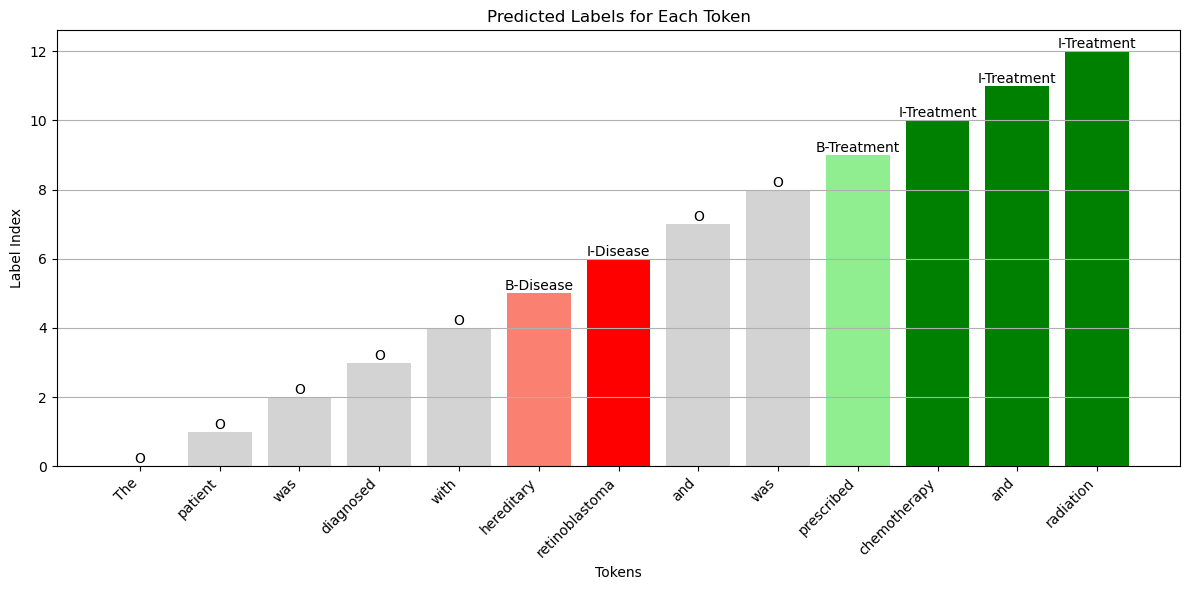

In [380]:
import matplotlib.pyplot as plt

# Check for length mismatch and handle accordingly
if len(sentence) != len(predictions):
    print("Length mismatch detected. Adjusting predictions...")
    # Adjust the length of predictions to match sentence
    min_length = min(len(sentence), len(predictions))
    sentence = sentence[:min_length]
    predictions = predictions[:min_length]

# Convert predictions to numerical values for plotting
prediction_indices = list(range(len(predictions)))  # Use numerical indices for y-axis

# Create a mapping from labels to colors for better visualization
label_colors = {
    "O": "lightgray",
    "B-Disease": "salmon",
    "I-Disease": "red",
    "B-Treatment": "lightgreen",
    "I-Treatment": "green"
}
colors = [label_colors.get(pred, 'blue') for pred in predictions]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(prediction_indices, prediction_indices, tick_label=sentence, color=colors)
plt.xlabel('Tokens')
plt.ylabel('Label Index')
plt.title('Predicted Labels for Each Token')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add labels to bars
for i, (label, color) in enumerate(zip(predictions, colors)):
    plt.text(i, prediction_indices[i], label, ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig('predicted_labels.png')  # Save the plot as an image
plt.show()